# Analysis Demo Services Churning of Telco-customer

Project objective and aim
- To identify the key services used by the unique demographic
- To identify the churn rate of each services
- Create a visual representation of the result using Seaborn

## Information on Dataset

Using Telco Customer churn data obtain from Kaggle: https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download.
> The data was downloaded onto a local machine on the  27/01/2025

Features of the dataset 
- Customer ID: Unique code to each customer
- Gender: Whether the customer is a male or a female
- Senior Citizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- Tenure: Number of months the customer has stayed with the company
- PoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card
- MonthlyCharges: The amount charged to the customer monthly
- TotalCharges: The total amount charged to the customer
- Churn: Whether the customer churned or not (Yes or No)

## Loading dataset

Import the required libraries.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

Loading the data

In [60]:
Churn_df = pd.read_csv('Telco-Customer-Churn-Data-Update.csv')
Churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,Segment,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,Segment 3,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Segment 10,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Segment 10,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,Segment 10,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Segment 11,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Exploring the data set

Displaying the top 5 rows and columns of the dataset to get a feel of how the dataset look.

In [61]:
# Exploring the numbers of rows and columns of data in the dataset.
Churn_df.shape

(7043, 22)

### Getting more information on the data

Exploring the dataset and identify the data types of each column.

In [62]:
Churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Segment           7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 



Note:
* The data set have 7043 observation and 21 variable.
* There is no missing data

In [63]:
Churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


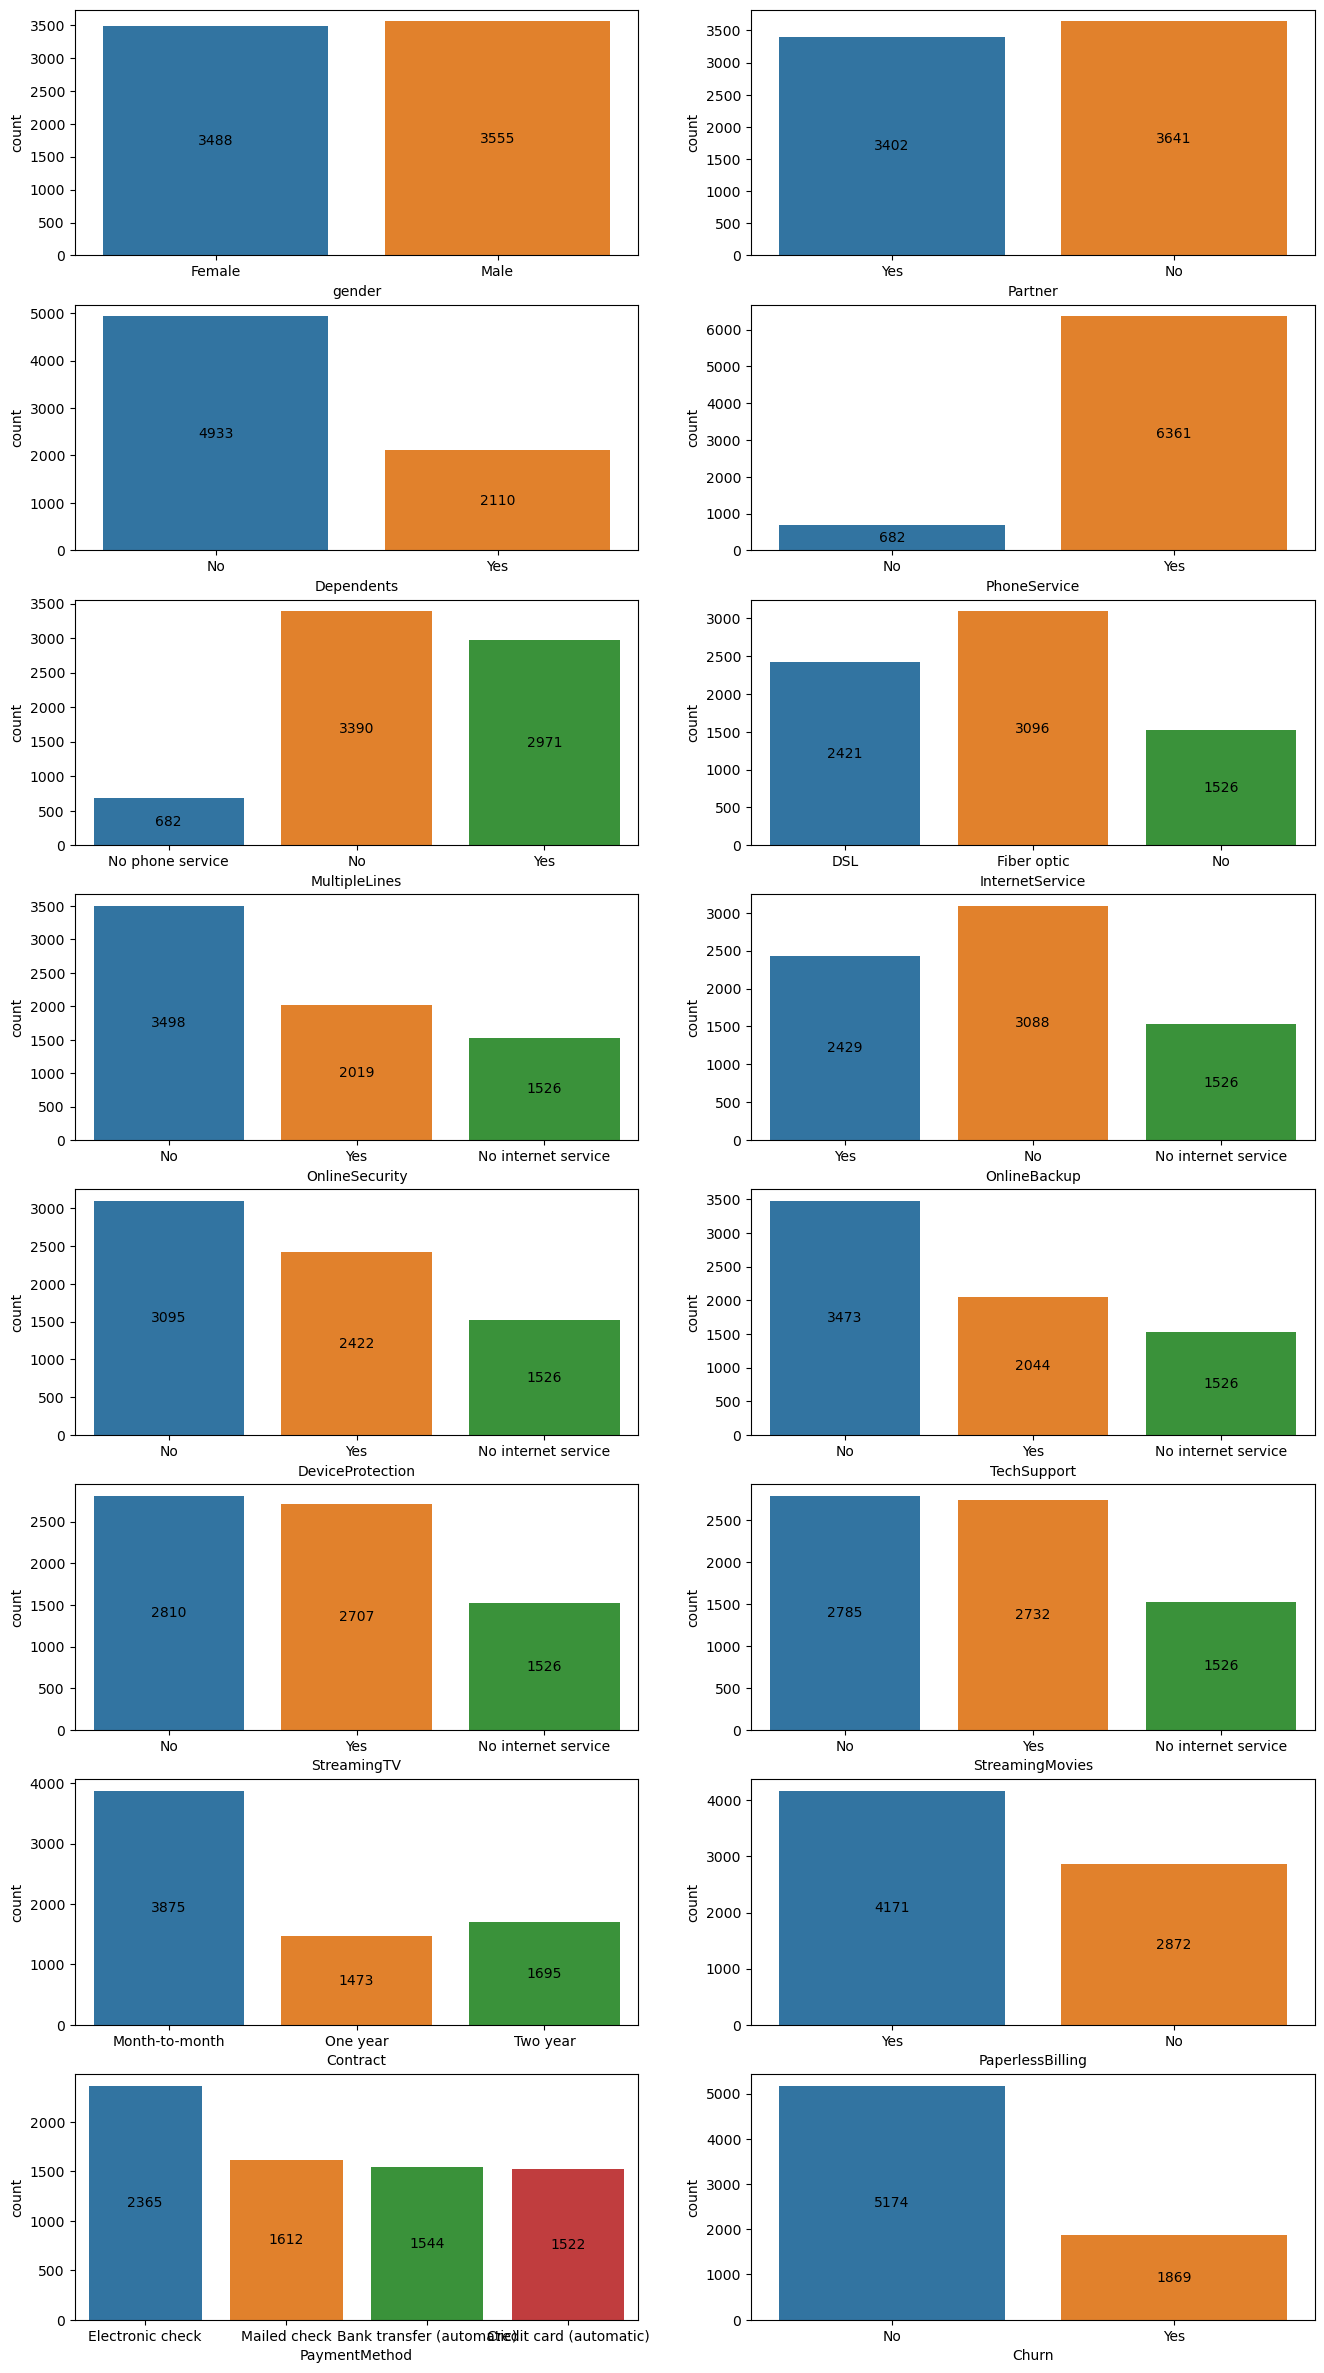

In [64]:
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 
                    'Contract', 'PaperlessBilling',	'PaymentMethod', 'Churn']

fig = plt.figure(figsize=(16,30))

for idx, col in enumerate(categorical_cols):
    ax = plt.subplot(8,2, idx+1)
    sns.countplot(x=Churn_df[col], ax=ax)
    for container in ax.containers:
        ax.bar_label(container, label_type = 'center')

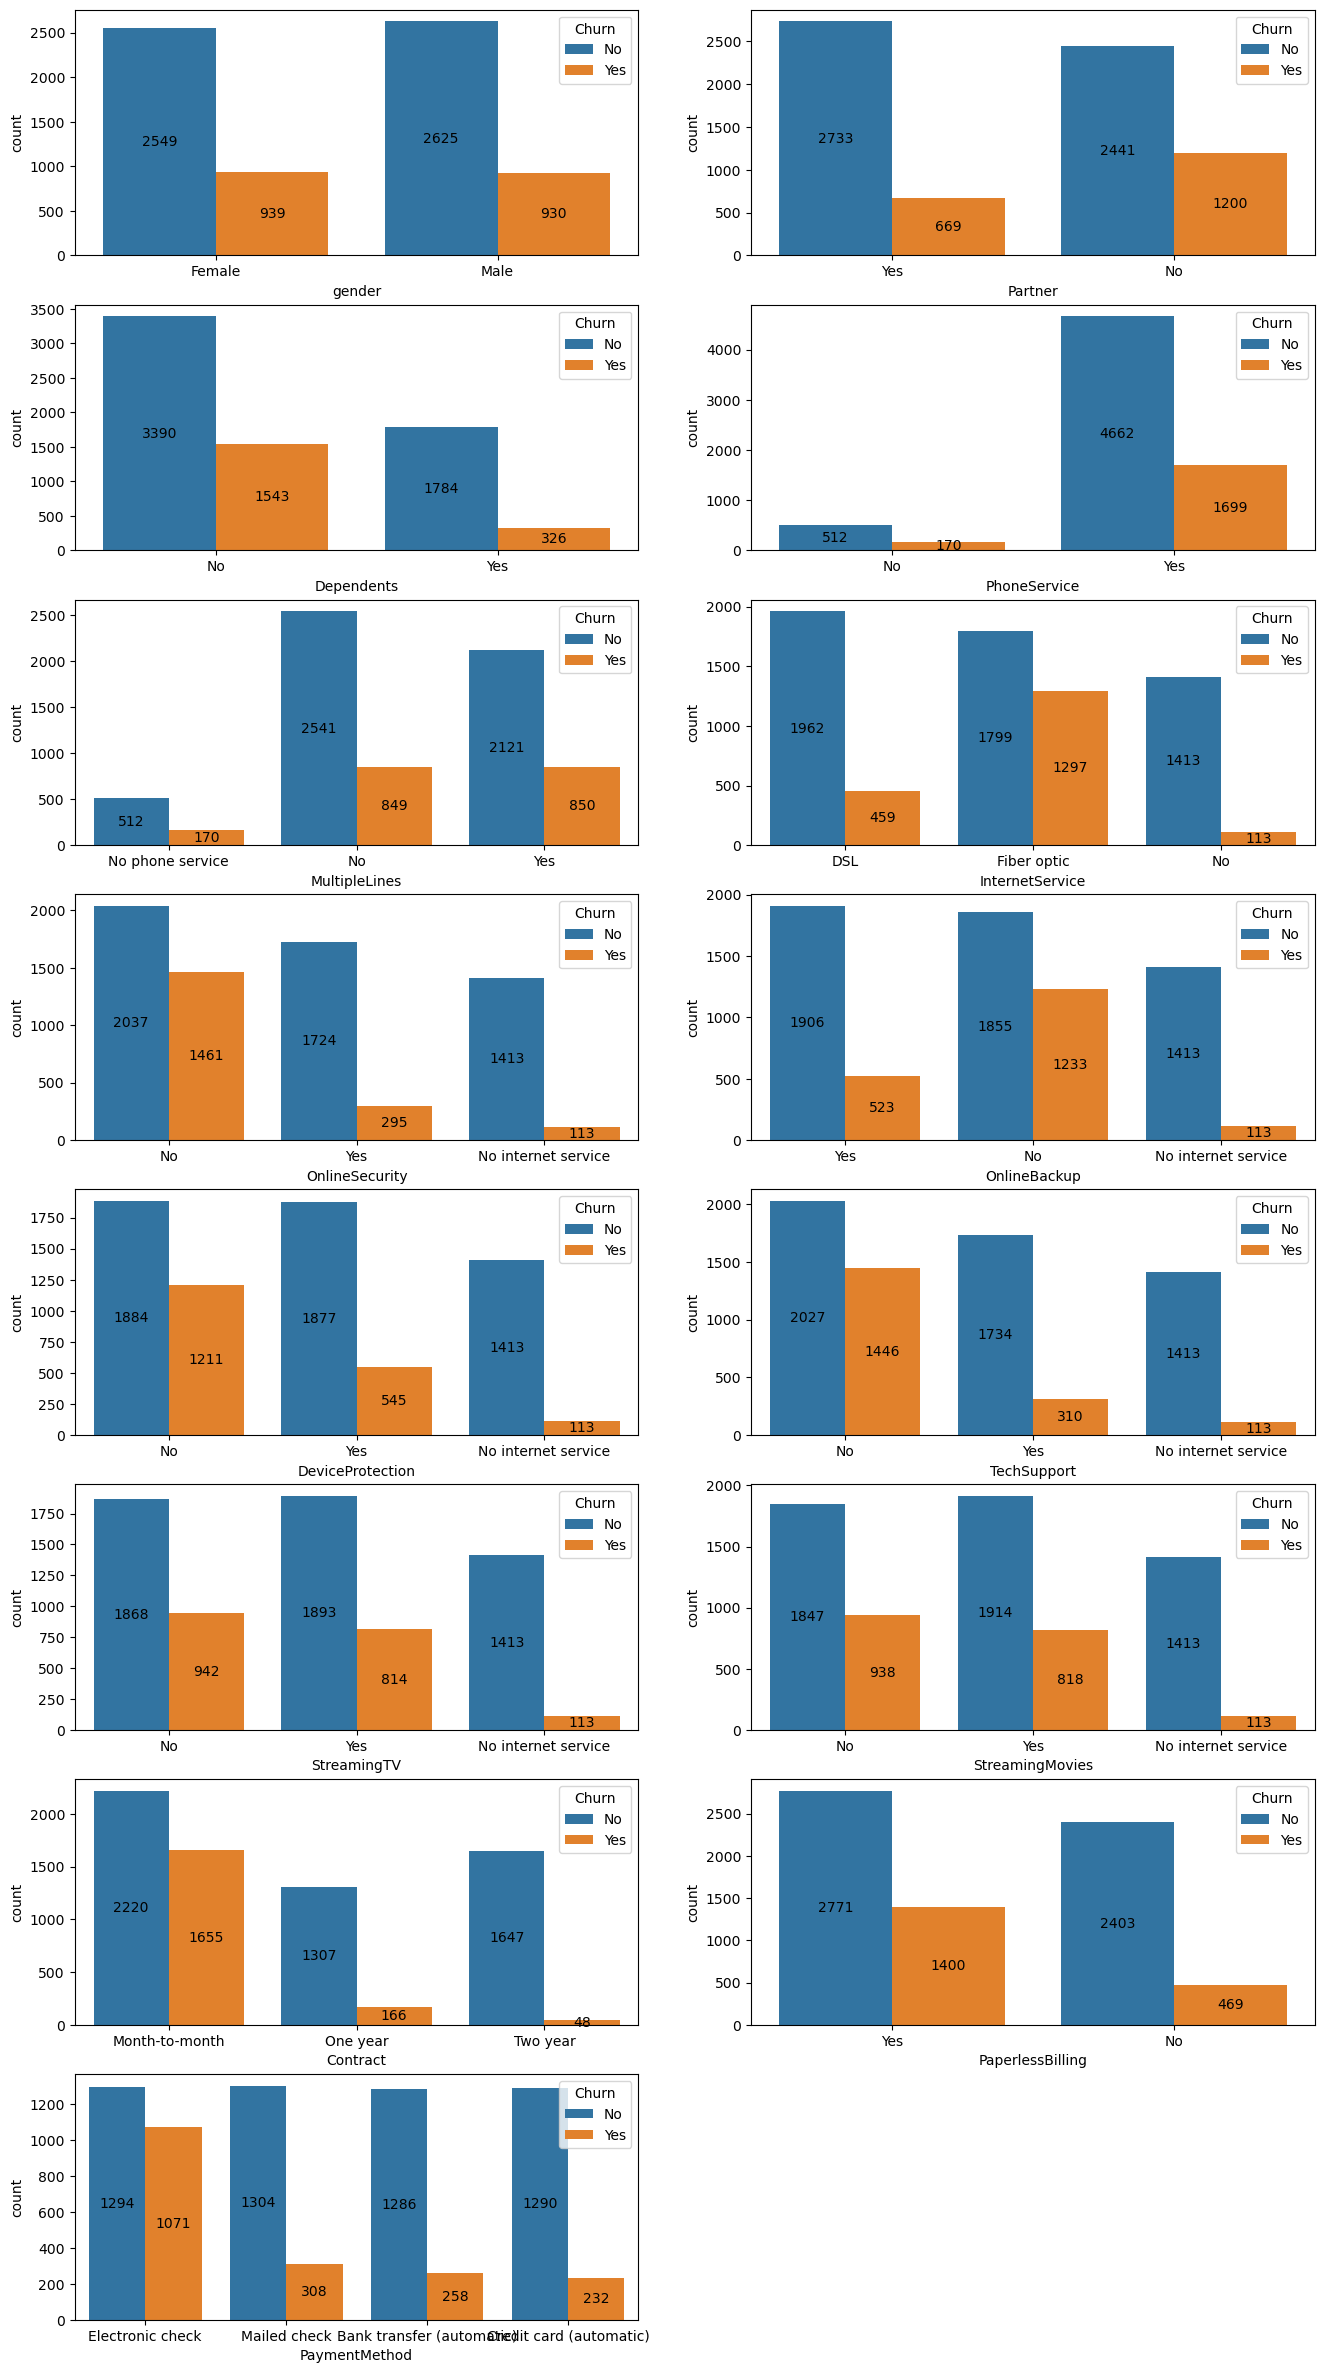

In [65]:
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 
                    'Contract', 'PaperlessBilling',	'PaymentMethod']

fig = plt.figure(figsize=(16,30))

for idx, col in enumerate(categorical_cols):
    ax = plt.subplot(8,2, idx+1)
    sns.countplot(x=Churn_df[col], hue=Churn_df['Churn'], ax=ax)
    for container in ax.containers:
        ax.bar_label(container, label_type = 'center')

In [66]:
model_data = Churn_df.copy()

In [67]:
model_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


## Data Wrangling

### Searching duplicates Values

In [68]:
model_data.duplicated().value_counts()

False    7043
Name: count, dtype: int64

No duplicate find

### Searching Missing Values

In [69]:
missing_data = model_data.isnull().sum()
missing_data

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Segment             0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [70]:
model_data = model_data.drop(["customerID"], axis=1)

In [71]:
model_data = pd.get_dummies(model_data, drop_first=True)
model_data.head(15)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,Segment_Segment 10,Segment_Segment 11,Segment_Segment 12,Segment_Segment 13,Segment_Segment 14,Segment_Segment 15,Segment_Segment 16,Segment_Segment 2,Segment_Segment 3,Segment_Segment 4,Segment_Segment 5,Segment_Segment 6,Segment_Segment 7,Segment_Segment 8,Segment_Segment 9,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True
5,0,8,99.65,820.50,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,True,False,True,False,True
6,0,22,89.10,1949.40,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False
7,0,10,29.75,301.90,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
8,0,28,104.80,3046.05,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False,True,False,True,False,True
9,0,62,56.15,3487.95,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [72]:
model_data.to_csv("model_data.csv", index = False)

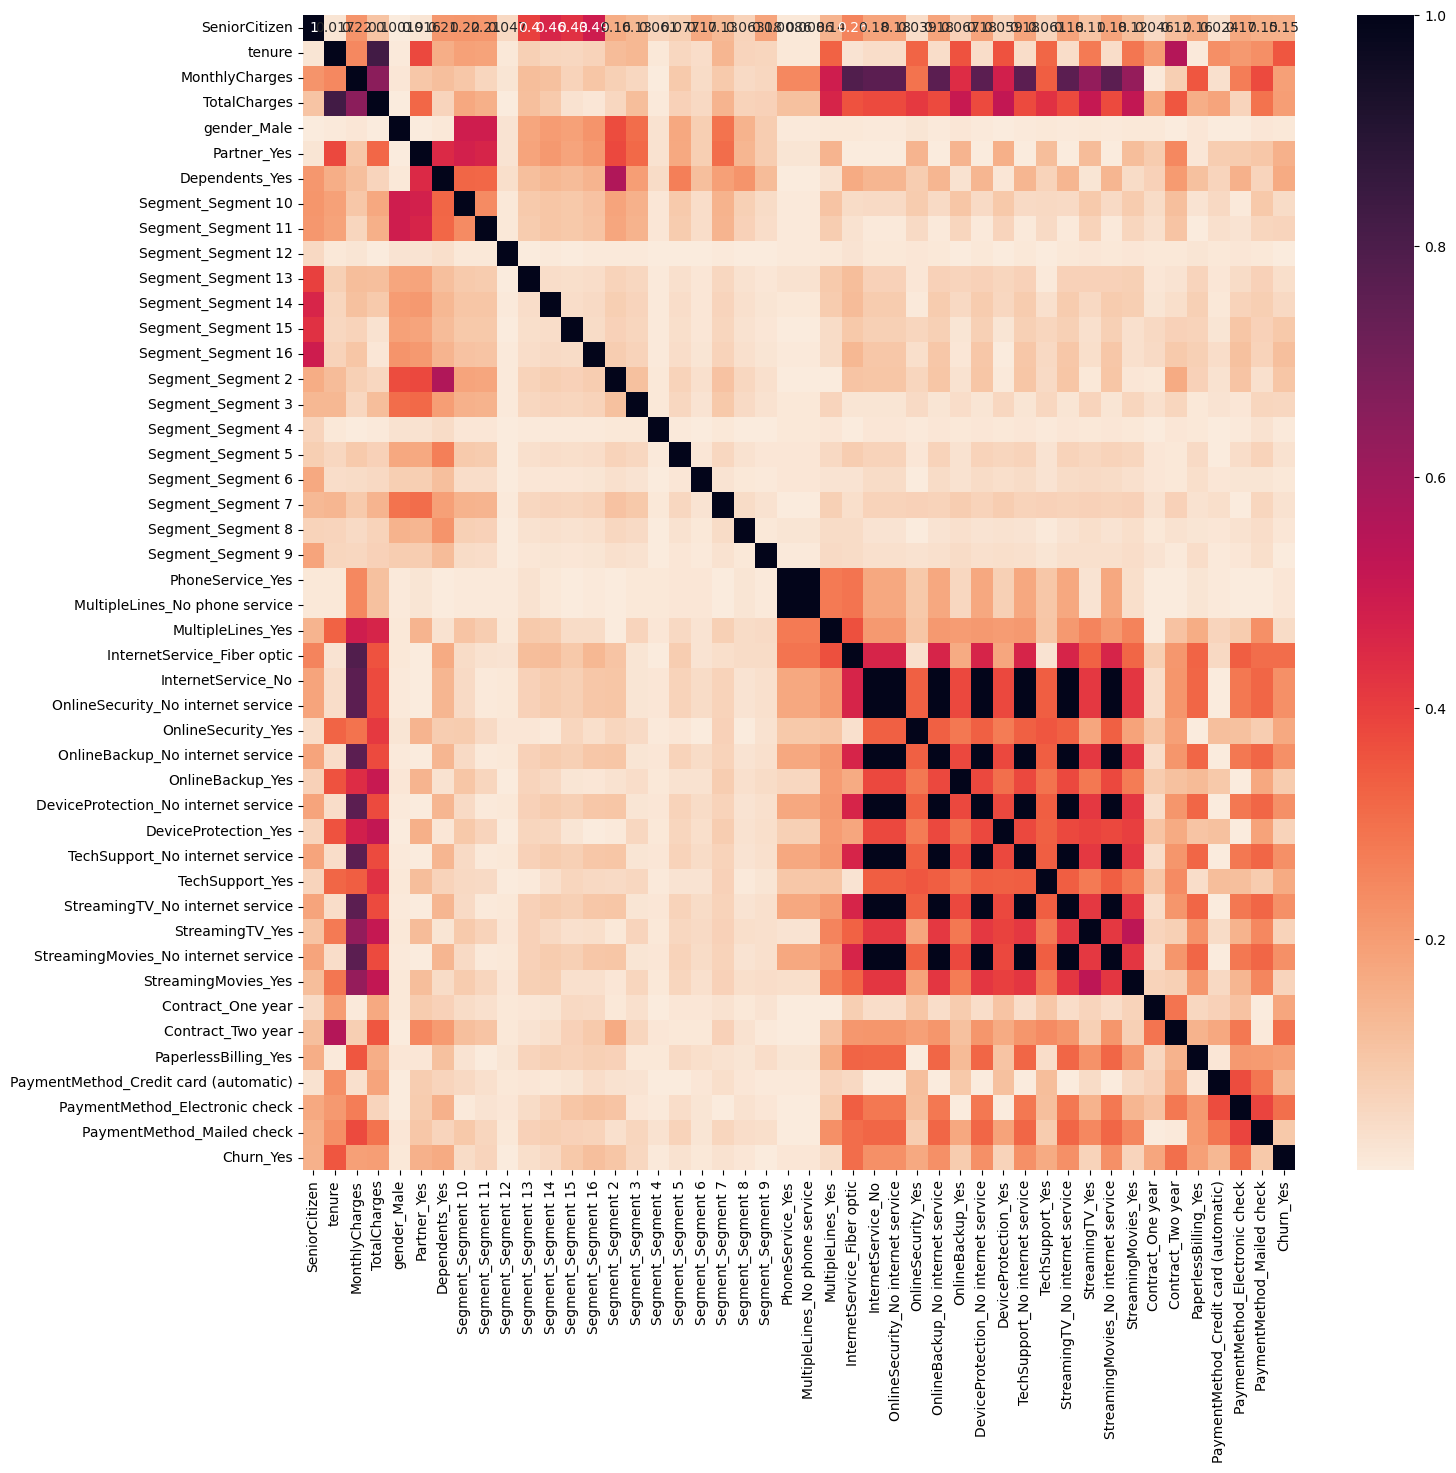

In [73]:
correlations = abs(model_data.corr())
plt.figure(figsize=(16,15))
sns.heatmap(correlations, annot=True, cmap="rocket_r")
plt.show()

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


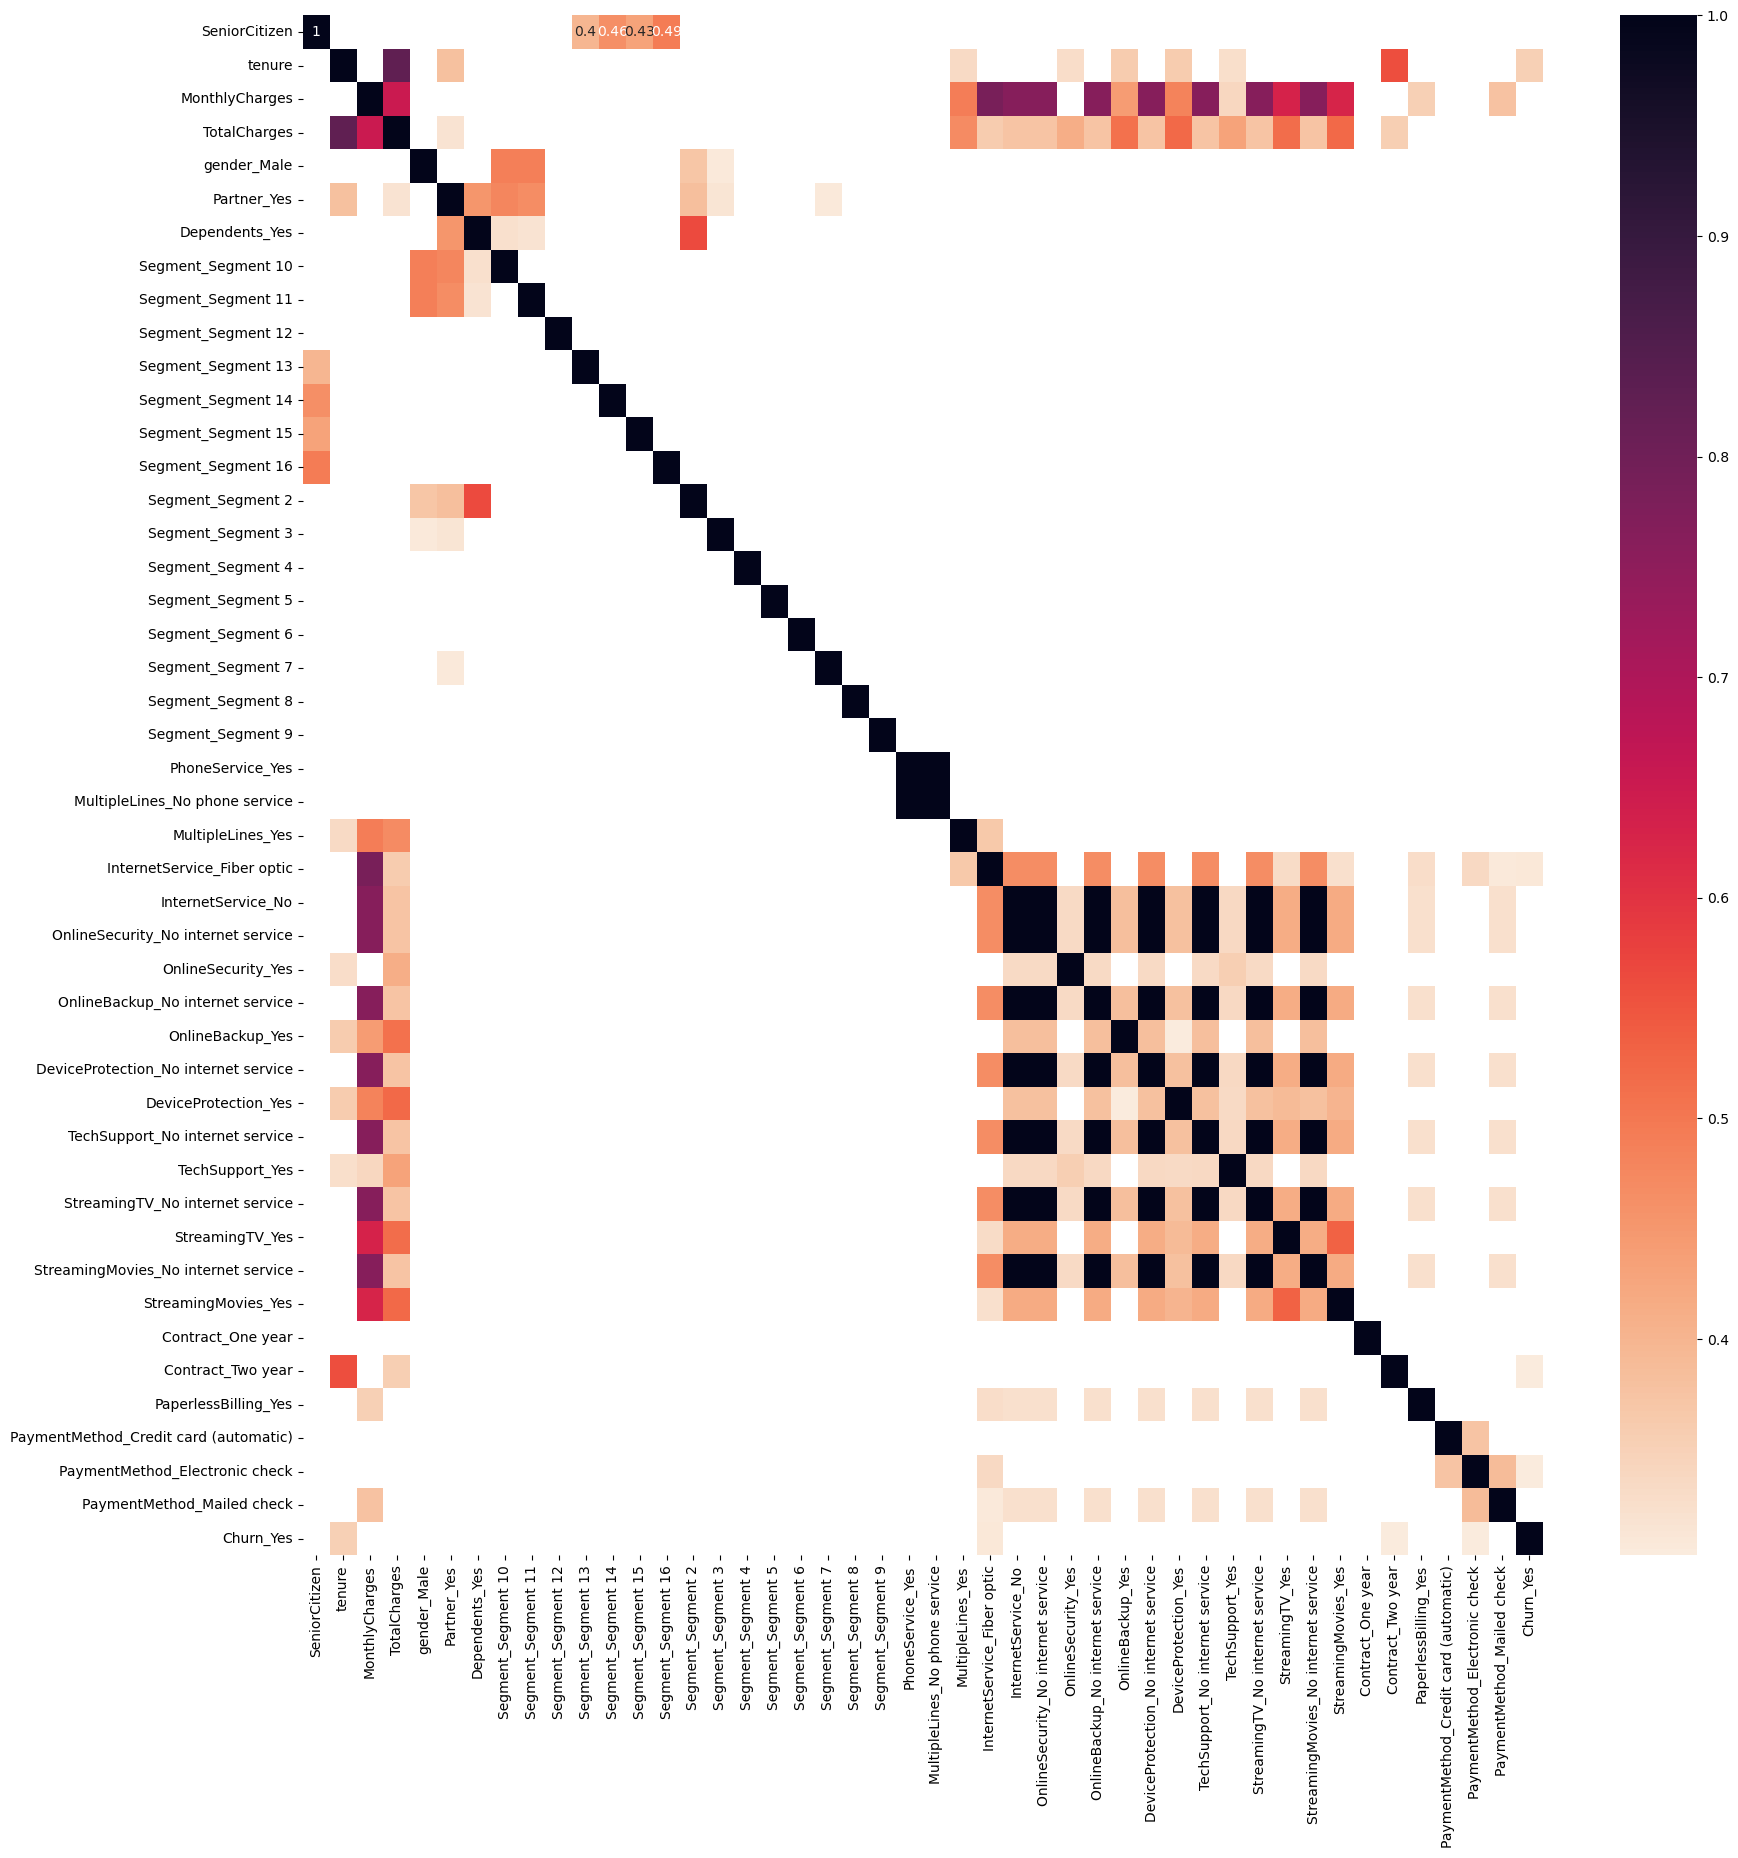

In [74]:
correlations = abs(model_data.corr())
plt.figure(figsize=(20,20))
sns.heatmap(correlations[correlations > 0.3], annot=True, cmap="rocket_r")
plt.show()

In [75]:

pd.set_option('display.max_columns', None)
correlations[correlations > 0.3]

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,Segment_Segment 10,Segment_Segment 11,Segment_Segment 12,Segment_Segment 13,Segment_Segment 14,Segment_Segment 15,Segment_Segment 16,Segment_Segment 2,Segment_Segment 3,Segment_Segment 4,Segment_Segment 5,Segment_Segment 6,Segment_Segment 7,Segment_Segment 8,Segment_Segment 9,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
SeniorCitizen,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.397526,0.463389,0.430628,0.493493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,NaN,1.000000,NaN,0.826178,NaN,0.379697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.331941,NaN,NaN,NaN,0.327203,NaN,0.360277,NaN,0.360653,NaN,0.324221,NaN,NaN,NaN,NaN,NaN,0.558533,NaN,NaN,NaN,NaN,0.352229
MonthlyCharges,NaN,NaN,1.000000,0.651174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.490434,0.787066,0.763557,0.763557,NaN,0.763557,0.441780,0.763557,0.482692,0.763557,0.338304,0.763557,0.629603,0.763557,0.627429,NaN,NaN,0.352150,NaN,NaN,0.377437,NaN
TotalCharges,NaN,0.826178,0.651174,1.000000,NaN,0.317504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.468504,0.361655,0.375223,0.375223,0.411651,0.375223,0.509226,0.375223,0.521983,0.375223,0.431883,0.375223,0.514973,0.375223,0.520122,NaN,0.354481,NaN,NaN,NaN,NaN,NaN
gender_Male,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.489193,0.488913,NaN,NaN,NaN,NaN,NaN,0.372513,0.306956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner_Yes,NaN,0.379697,NaN,0.317504,NaN,1.000000,0.452676,0.477385,0.468120,NaN,NaN,NaN,NaN,NaN,0.381728,0.314548,NaN,NaN,NaN,0.306113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents_Yes,NaN,NaN,NaN,NaN,NaN,0.452676,1.000000,0.322996,0.316728,NaN,NaN,NaN,NaN,NaN,0.564189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Segment_Segment 10,NaN,NaN,NaN,NaN,0.489193,0.477385,0.322996,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Segment_Segment 11,NaN,NaN,NaN,NaN,0.488913,0.468120,0.316728,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Segment_Segment 12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
X = model_data.drop(["Churn_Yes"], axis =1)
y = model_data["Churn_Yes"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 417)

features = [
    "tenure",
    "InternetService_Fiber optic",
    "Contract_Two year",
    "PaymentMethod_Electronic check"
]

for feature in features:
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_train[[feature]], y_train)
    accuracy = knn.score(X_val[[feature]], y_val)
    print(f"The k-NN classifier trained on {feature} and with k = 3 has an accuracy of {accuracy*100}%")

The k-NN classifier trained on tenure and with k = 3 has an accuracy of 70.94178892569806%
The k-NN classifier trained on InternetService_Fiber optic and with k = 3 has an accuracy of 74.15996213913867%
The k-NN classifier trained on Contract_Two year and with k = 3 has an accuracy of 74.15996213913867%
The k-NN classifier trained on PaymentMethod_Electronic check and with k = 3 has an accuracy of 74.15996213913867%


In [77]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features])
X_val_scaled = scaler.transform(X_val[features])

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_scaled, y_train)
accuracy = knn.score(X_val_scaled, y_val)
print(f"Accuracy: {accuracy*100:.2f}")

Accuracy: 76.05


In [78]:
X = model_data.drop(["Churn_Yes"], axis =1)
y = model_data["Churn_Yes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 417)

features = [
    #"Partner_Yes",
    "tenure",
    "InternetService_Fiber optic",
    "Contract_Two year",
    "PaymentMethod_Electronic check"
]

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features])

In [83]:
grid_params = {"n_neighbors": range(1, 20),
              "metric": ["minkowski", "manhattan", "hamming", "euclidean" ]
              }
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, grid_params, scoring = 'accuracy')
knn_grid.fit(X_train_scaled, y_train);

In [84]:
knn_grid.best_score_*100, knn_grid.best_params_

(78.78296146044626, {'metric': 'minkowski', 'n_neighbors': 18})

In [85]:
X_test_scaled = scaler.transform(X_test[features])
predictions = knn_grid.best_estimator_.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy on test set: {accuracy*100: .2f}")

Model Accuracy on test set:  78.66


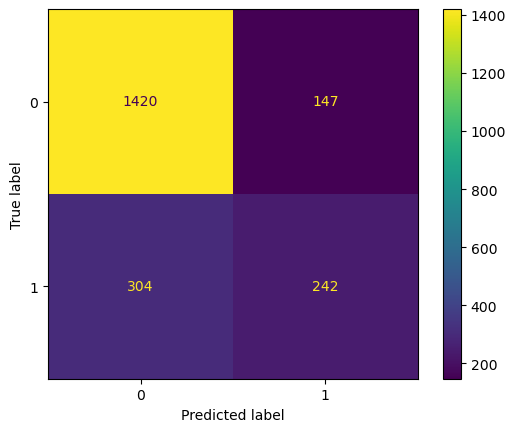

In [86]:
cf = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cf).plot()
plt.show()

## Findings

### Predictive Modeling with K-Nearest Neighbors (KNN)

#### **Modeling Approach**
The **KNeighbors Classifier** was used to build a predictive model to identify future customers likely to churn.

## **Modeling Approach**
The **KNeighbors Classifier** was used to build a predictive model to identify future customers likely to churn.

## **Feature Scaling**
Since KNN relies on distance-based calculations, feature scaling was applied using **MinMaxScaler** to ensure consistent value rangtures])


#### **Feature Correlation to Churn**
The features with the strongest correlation to churn were identified as:
- **Tenure**: 0.35229
- **Fibre Optic Internet Services**: 0.308020
- **Two-Year Contract**: 0.302253
- **Electronic Check Payment**: 0.301919

#### **Model Performance**
Each feature was used **individually** to build a model using the default KNN metric with `k = 3`. The accuracy results were:
- **Tenure:** 70.94%
- **Other Features:** 74.16% (each)

When these features were used **collectively**, the accuracy improved to **76.05%**, still using `k = 3`.

#### **Hyperparameter Optimization**
To enhance the model further, the best metric among `"minkowski"`, `"manhattan"`, `"hamming"`, and `"euclidean"`, along with a `k-value` in the range of `1 to 20`, was searched. The optimal values were:
- **Metric:** Minkowski
- **k-value:** 18
- **Estimated Accuracy:** 78.78%
- **Actual Model Accuracy:** 78.66% (closely aligned with the estimate)

#### **Confusion Matrix Analysis**
The confusion matrix results are as follows:
- **True Negatives (Correctly classified non-churned customers):** 1,420
- **True Positives (Correctly classified churned customers):** 242
- **False Negatives (Churned customers misclassified as non-churned):** 304
- **False Positives (Non-churned customers misclassified as churned):** 147

#### **Summary**
- The model shows promising accuracy improvements through feature selection and hyperparameter tuning.
- While the model performs well overall, **false negatives remain a concern** as 304 churned customers were misclassified.
- Further refinement through **feature scaling, class balancing, and alternative modeling techniques** could improve accuracy.